<a href="https://colab.research.google.com/github/martinahuang/CUS615/blob/master/Heart_Disease_project2.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project - Heart Disease

In [0]:
%%capture
# Execute this cell first to download the necessary data and autility libraries.
# This cell installs sample data necessary for this workshop on your colab virtual enviroment

!wget -O /content/cus615_utils.py https://raw.githubusercontent.com/christoforou/intro_to_pandas_lab/master/cus615_utils/cus615_utils.py

Data Exploration and Pre-processing


In [0]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from cus615_utils import *



In [0]:
datafile = './sample_data/heart 2.csv'
df = pd.read_csv(datafile)

In [9]:
df.head()

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]

In [0]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target' ]

In [11]:
df.shape

(303, 14)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                        303 non-null int64
sex                        303 non-null int64
chest_pain_type            303 non-null int64
resting_blood_pressure     303 non-null int64
cholesterol                303 non-null int64
fasting_blood_sugar        303 non-null int64
rest_ecg                   303 non-null int64
max_heart_rate_achieved    303 non-null int64
exercise_induced_angina    303 non-null int64
st_depression              303 non-null float64
st_slope                   303 non-null int64
num_major_vessels          303 non-null int64
thalassemia                303 non-null int64
target                     303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
df.describe()

age         sex  ...  thalassemia      target
count  303.000000  303.000000  ...   303.000000  303.000000
mean    54.366337    0.683168  ...     2.313531    0.544554
std      9.082101    0.466011  ...     0.612277    0.498835
min     29.000000    0.000000  ...     0.000000    0.000000
25%     47.500000    0.000000  ...     2.000000    0.000000
50%     55.000000    1.000000  ...     2.000000    1.000000
75%     61.000000    1.000000  ...     3.000000    1.000000
max     77.000000    1.000000  ...     3.000000    1.000000

[8 rows x 14 columns]

In [72]:
NoDisease = len(df[df.target == 0])
HaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((NoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((HaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


Data Visualization


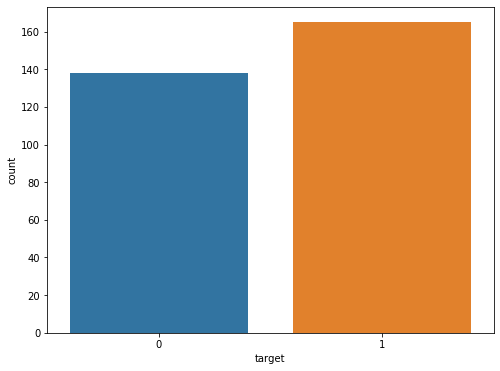

In [0]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", data=df)
plt.show()

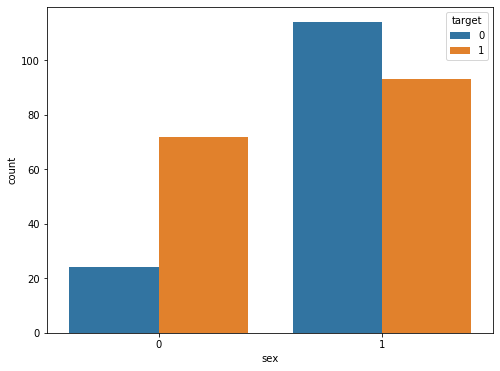

In [0]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="sex", hue="target", data=df)
plt.show()

In [0]:
df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

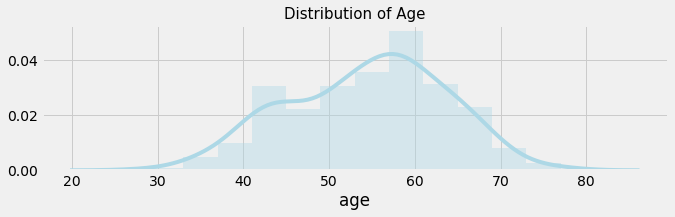

In [85]:
#Distribution of age
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 2.5)
sns.distplot(df['age'], color = 'lightblue')
plt.title('Distribution of Age', fontsize = 15)
plt.show()

In [0]:
Age vs Heart Rate

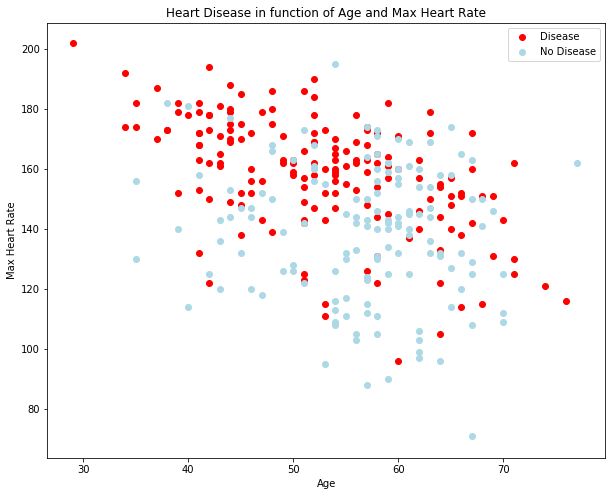

In [14]:
plt.figure(figsize=(10, 8))

# Scatter with postive examples
plt.scatter(df.age[df.target==1],
            df.max_heart_rate_achieved[df.target==1],
            c="red")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.max_heart_rate_achieved[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

Age vs Cholesterol

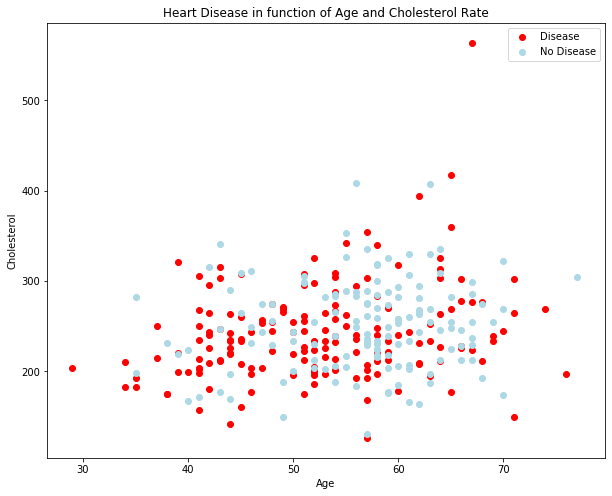

In [16]:
plt.figure(figsize=(10, 8))

# Scatter with postive examples
plt.scatter(df.age[df.target==1],
            df.cholesterol[df.target==1],
            c="red")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.cholesterol[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Cholesterol Rate")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.legend(["Disease", "No Disease"]);

Classification - Random Forest



In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_curve

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', 1), df['target'], test_size = .2, random_state=10) 
#Split the dataset


In [64]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
estimator = model.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

In [70]:
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

Training Accuracy : 0.9545454545454546
Testing Accuracy : 0.7868852459016393
              precision    recall  f1-score   support

           0       0.87      0.74      0.80        35
           1       0.71      0.85      0.77        26

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



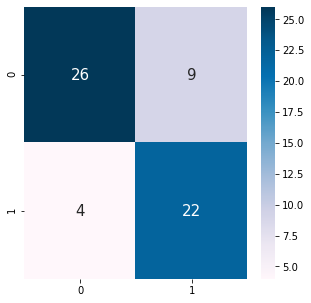

In [78]:

from sklearn.metrics import classification_report

model = RandomForestClassifier(n_estimators = 50, max_depth = 5)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# evaluating the model
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

# cofusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

In [79]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.8666666666666667
Specificity :  0.7096774193548387


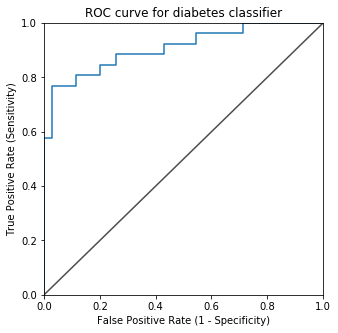

In [81]:
#ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for diabetes classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

Correlation matrix

(14.5, -0.5)

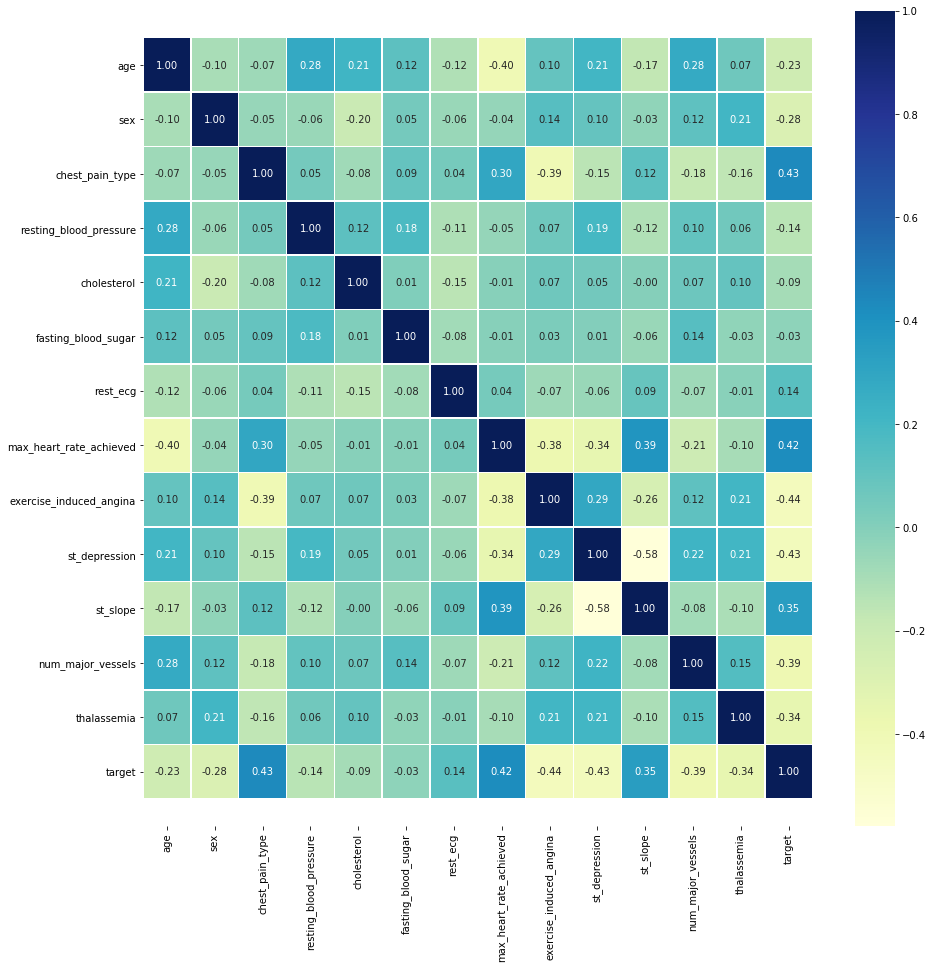

In [15]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

There are not features with more than 0.5 correlation rate.


Linear Regression

In [0]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [34]:
n_samples_train, n_features = X_train.shape
n_samples_test, _ = X_test.shape
n_classes = len(np.unique(y_train))

print("Number of samples in training set: %d ( %d positive, %d negative)" % (n_samples_train,np.sum(y_train==1),np.sum(y_train==0)))
print("Number of samples in the testing set: %d (%d positive, %d negative)" % (n_samples_test,np.sum(y_test==1),np.sum(y_test==0)))
print("Number of features: " +  str(n_features))
print("Number of classes: " + str(n_classes))
print("IDs for class labels: " + str(np.unique(y_train)))

Number of samples in training set: 212 ( 114 positive, 98 negative)
Number of samples in the testing set: 91 (51 positive, 40 negative)
Number of features: 13
Number of classes: 2
IDs for class labels: [0 1]


In [35]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
coeff_df = pd.DataFrame((lm.coef_)*100, X.columns, columns=['Coefficient (percentage %)'])
coeff_df

Coefficient (percentage %)
age                                       -0.247202
sex                                      -13.597603
chest_pain_type                           13.811263
resting_blood_pressure                    -0.184404
cholesterol                               -0.038506
fasting_blood_sugar                        2.448362
rest_ecg                                   5.619217
max_heart_rate_achieved                    0.193905
exercise_induced_angina                  -18.930060
st_depression                             -3.271612
st_slope                                  10.219239
num_major_vessels                        -10.192541
thalassemia                              -14.248815

In [0]:
#exercise_induced_angina has the highest negative number and exercise_induced_angina,thalassemia and chest_pain_type have the highest values by absolute number.


Support Vector Machine
an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier


In [0]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC, LinearSVC

In [0]:
target_name = 'target'
df_target = df[target_name]
data = df.drop([target_name], axis=1)

In [0]:
train, test, target, target_test = train_test_split(df, df_target, test_size=0.3, random_state=0)

In [101]:
svc = SVC()
svc.fit(train, target)
acc_svc = round(svc.score(train, target) * 100, 3)
acc_svc

66.509

In [102]:
acc_test_svc = round(svc.score(test, target_test) * 100, 2)
acc_test_svc

67.03

In [100]:
train.head()

age  sex  chest_pain_type  ...  num_major_vessels  thalassemia  target
137   62    1                1  ...                  0            2       1
106   69    1                3  ...                  1            2       1
284   61    1                0  ...                  1            3       0
44    39    1                2  ...                  0            2       1
139   64    1                0  ...                  1            3       1

[5 rows x 14 columns]

Linear SVC

In [103]:
linear_svc = LinearSVC(dual=False)  # dual=False when n_samples > n_features.
linear_svc.fit(train, target)
acc_linear_svc = round(linear_svc.score(train, target) * 100, 2)
acc_linear_svc

100.0

Accuracy of linear SVC


In [104]:
acc_test_linear_svc = round(linear_svc.score(test, target_test) * 100, 2)
acc_test_linear_svc

100.0

KNN 

In [105]:
knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': [2, 3]}, cv=10).fit(train, target)
acc_knn = round(knn.score(train, target) * 100, 2)
print(acc_knn, knn.best_params_)

76.89 {'n_neighbors': 3}


In [107]:
acc_test_knn = round(knn.score(test, target_test) * 100, 2)
acc_test_knn

68.13

In [118]:
knn1 = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': [1, 4]}, cv=10).fit(train, target)
acc_knn1 = round(knn.score(train, target) * 100, 2)
print(acc_knn1, knn1.best_params_)

74.53 {'n_neighbors': 4}


In [113]:
acc_test_knn1 = round(knn1.score(test, target_test) * 100, 2)
acc_test_knn1

68.13

In [116]:
knn2 = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': [6, 6]}, cv=10).fit(train, target)
acc_knn2 = round(knn.score(train, target) * 100, 2)
print(acc_knn2, knn2.best_params_)

74.53 {'n_neighbors': 6}
